In [4]:
import pandas as pd
import numpy as np
import sklearn
import openpyxl
import json
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor, NearestNeighbors
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import OneClassSVM
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [5]:
# chemical_composition = ['C', 'Si', 'Mn', 'Cu', 'Ni', 'Mo','Cr', 'V']
chemical_composition = ["C", "Si", "Mn", "Mg", "Cu", "Ni", "Mo", "CE"]
heat_treatment = ['aust_temp', 'aust_czas', 'ausf_temp', 'ausf_czas']
physical_properties = ['Rm', 'Rp02', 'A5', 'HB', 'K']
additional_features = ['grubosc']
all_cols = chemical_composition + heat_treatment + additional_features + physical_properties

In [6]:
!rm zebrane-dane-2.xlsx
!wget https://github.com/somas3k/master_thesis/raw/master/zebrane-dane-2.xlsx
excel_data_path = "zebrane-dane-2.xlsx"
df_org = pd.read_excel(excel_data_path, sheet_name="Dane", header=1, usecols=all_cols)
df_org

'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


,C,Si,CE,Mn,Mg,Cu,Ni,Mo,aust_temp,aust_czas,ausf_temp,ausf_czas,Rm,Rp02,A5,HB,K,grubosc
0,3.40,2.30,4.178000,0.17,0.047,0.70,1.50,0.24,900,120,240,120,1507.0,1072.0,2.8,429.0,54.4,25
1,3.40,2.30,4.178000,0.17,0.047,0.70,1.50,0.24,900,120,270,120,1307.0,936.0,4.1,388.0,71.6,25
2,3.40,2.30,4.178000,0.17,0.047,0.70,1.50,0.24,900,120,310,120,1132.0,804.0,5.4,341.0,84.4,25
3,3.40,2.30,4.178000,0.17,0.047,0.70,1.50,0.24,900,120,360,120,1028.0,652.0,10.0,285.0,123.6,25
4,3.52,2.87,4.693333,0.22,0.051,0.73,1.55,0.00,850,120,390,90,1064.9,NaN,15.4,296.8,NaN,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,3.97,1.57,4.494333,0.49,0.059,0.00,0.00,0.00,850,30,370,60,NaN,NaN,NaN,NaN,51.0,25
685,3.97,1.57,4.494333,0.49,0.059,0.00,0.00,0.00,850,30,400,60,NaN,NaN,NaN,NaN,30.0,25
686,3.97,1.57,4.494333,0.49,0.059,0.00,0.00,0.00,950,15,340,60,NaN,NaN,NaN,NaN,28.0,25
687,3.97,1.57,4.494333,0.49,0.059,0.00,0.00,0.00,950,15,370,60,NaN,NaN,NaN,NaN,48.5,25


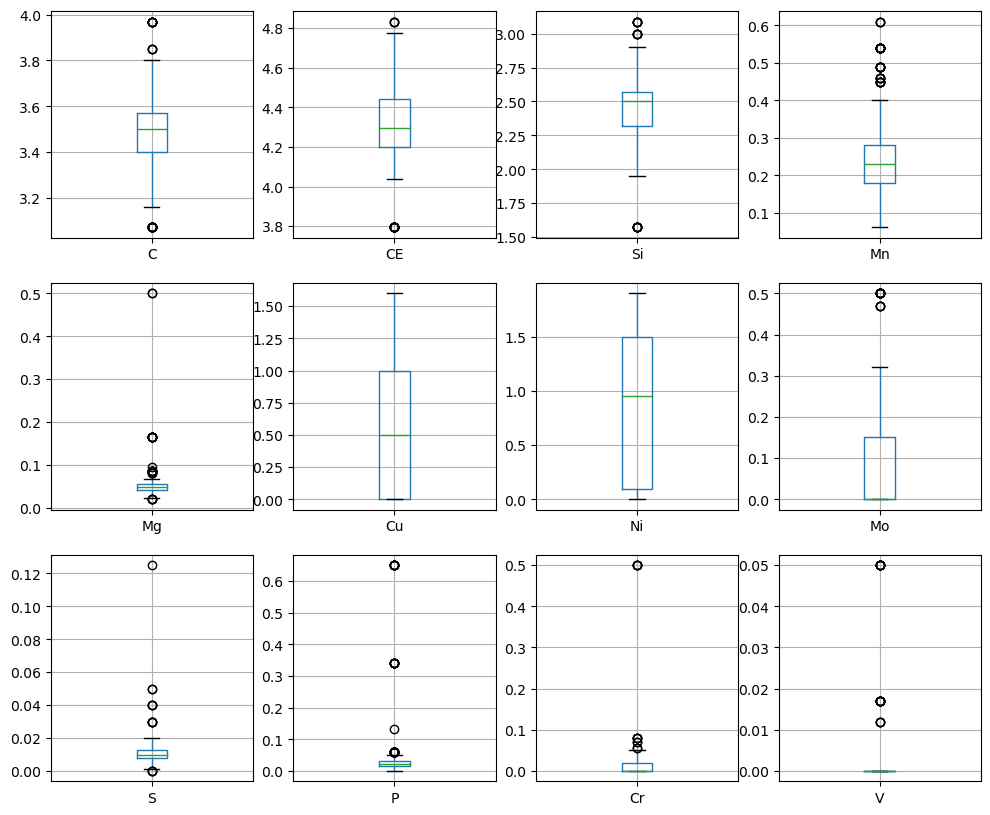

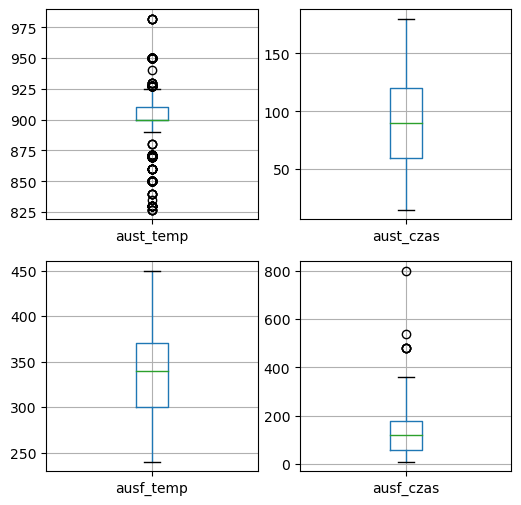

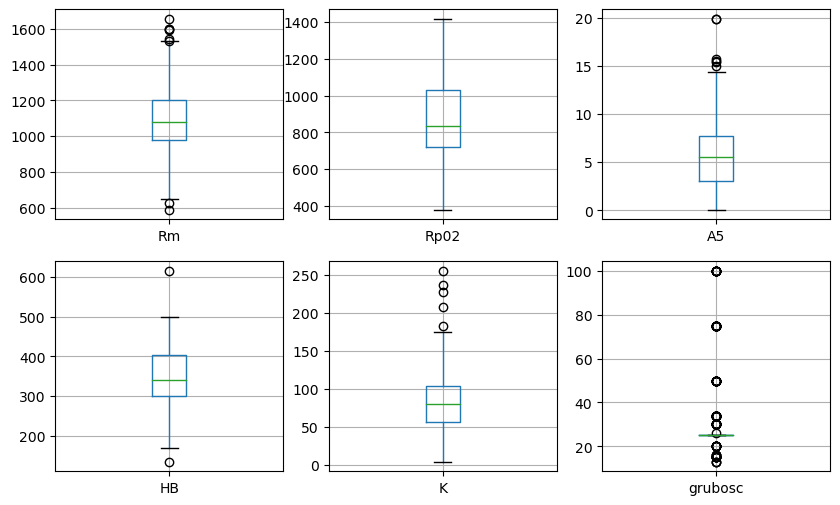

In [52]:
import matplotlib.pyplot as plt
import math
plt.style.use('default')
plt.rcParams["figure.figsize"] = (10,5)

def boxplot_of_with_size(df, columns, size, fig_size):
    rows = int(math.ceil(len(columns)/size))
    fig, axes = plt.subplots(rows, size, figsize=fig_size)
    i = 0
    j = 0
    for feat in columns:
        if rows == 1:
            df_org.boxplot(column=[feat], ax=axes[j])
        else:
            df_org.boxplot(column=[feat], ax=axes[i][j])
        j = j+1
        if j == size: 
            j = 0
            i = i +1
    plt.show()

boxplot_of_with_size(df_org, chemical_composition, 4, (12,10))
boxplot_of_with_size(df_org, heat_treatment, 2, (6,6))
boxplot_of_with_size(df_org, physical_properties + ['grubosc'], 3, (10, 6))

array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'CE'}>,
        <AxesSubplot:title={'center':'Mn'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Cu'}>,
        <AxesSubplot:title={'center':'Ni'}>,
        <AxesSubplot:title={'center':'Mo'}>,
        <AxesSubplot:title={'center':'S'}>,
        <AxesSubplot:title={'center':'P'}>],
       [<AxesSubplot:title={'center':'V'}>,
        <AxesSubplot:title={'center':'Cr'}>,
        <AxesSubplot:title={'center':'aust_temp'}>,
        <AxesSubplot:title={'center':'aust_czas'}>,
        <AxesSubplot:title={'center':'ausf_temp'}>],
       [<AxesSubplot:title={'center':'ausf_czas'}>,
        <AxesSubplot:title={'center':'Rm'}>,
        <AxesSubplot:title={'center':'Rp02'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'HB'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title

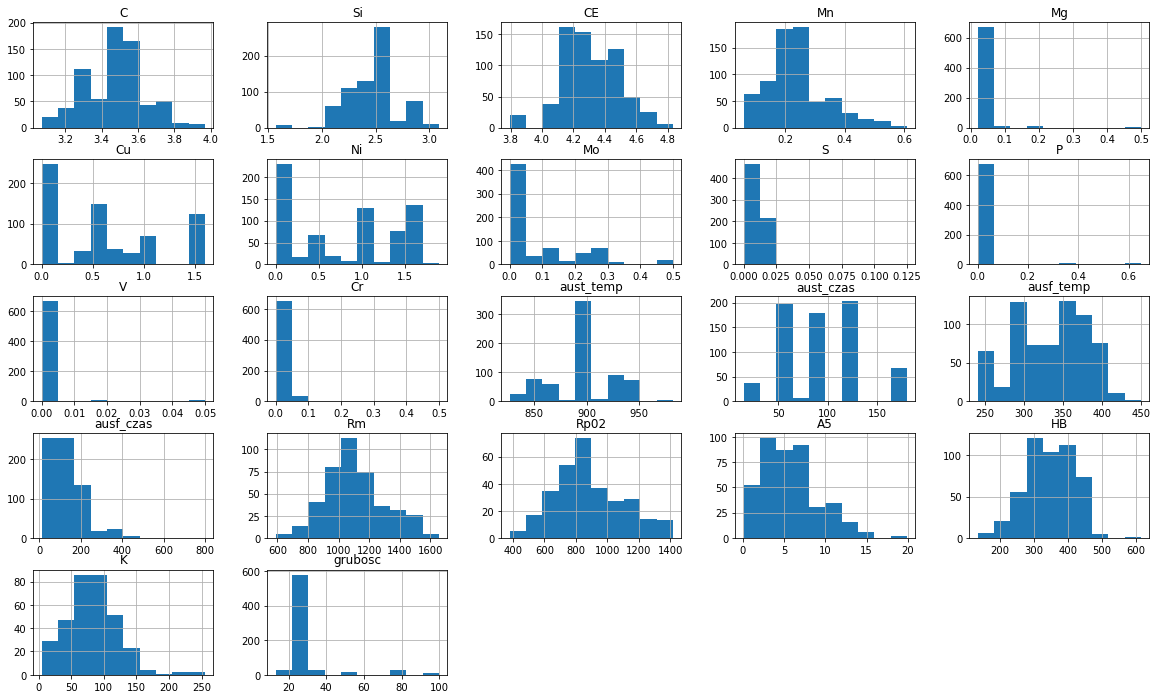

In [4]:
plt.rcParams["figure.figsize"] = (20,12)
df_org.hist()

In [19]:
from pandas.plotting import scatter_matrix
# scatter_matrix(df_org, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [7]:
df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "Rm"
df_comp[predictors+[target_column]].describe()

,C,Si,Mn,Mg,Cu,Ni,Mo,CE,aust_temp,aust_czas,ausf_temp,ausf_czas,grubosc,log_10(ausf_czas_sec),Rm
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,425.000000
mean,3.475039,2.467228,0.242335,0.051302,0.600122,0.778710,0.080976,4.308975,898.416546,95.885341,335.219158,122.442671,28.924528,3.764736,1104.713176
std,0.164055,0.227081,0.097739,0.029566,0.573733,0.632711,0.119591,0.182115,30.764849,38.789083,43.768782,88.824935,13.738107,0.301986,195.263857
min,3.070000,1.570000,0.061000,0.020000,0.000000,0.000000,0.000000,3.793333,827.000000,15.000000,240.000000,10.000000,13.000000,2.778151,588.000000
25%,3.400000,2.320000,0.180000,0.042000,0.001000,0.090000,0.000000,4.198333,900.000000,60.000000,300.000000,60.000000,25.000000,3.556303,979.000000
50%,3.500000,2.500000,0.230000,0.049000,0.500000,0.950000,0.001000,4.293333,900.000000,90.000000,340.000000,120.000000,25.000000,3.857332,1082.000000
75%,3.570000,2.570000,0.280000,0.055000,1.000000,1.500000,0.150000,4.441667,910.000000,120.000000,370.000000,180.000000,25.000000,4.033424,1201.000000
max,3.970000,3.090000,0.610000,0.500000,1.600000,1.900000,0.500000,4.833333,982.000000,180.000000,450.000000,800.000000,100.000000,4.681241,1657.000000


In [6]:
# def round_to(series, val, limit):
#     if limit == 'min':
#         l = series.min()
#         return l + ((val - l % val) if l % val else 0)
#     if limit == 'max':
#         l = series.max()
#         return l - (l % val)

# def get_possible_values_list(min_val, max_val, step):
#     return list(np.linspace(min_val, max_val, int((max_val - min_val)/step) + 1))

# df_comp = df_org.copy()
# compositions = set([json.dumps(dict) for dict in df_comp[chemical_composition].to_dict('records')])
# compositions = list([json.loads(comp) for comp in compositions])
# for i, comp in enumerate(compositions):
#     comp['id'] = i
# temps = ['aust_temp', 'ausf_temp']
# temp_step = 5
# time_step = 15

# min_aust_temp = round_to(df_comp['aust_temp'], temp_step, 'min')
# max_aust_temp = round_to(df_comp['aust_temp'], temp_step, 'max')
# min_ausf_temp = round_to(df_comp['ausf_temp'], temp_step, 'min')
# max_ausf_temp = round_to(df_comp['ausf_temp'], temp_step, 'max')
# min_aust_time = round_to(df_comp['aust_czas'], time_step, 'min')
# max_aust_time = round_to(df_comp['aust_czas'], time_step, 'max')
# min_ausf_time = round_to(df_comp['ausf_czas'], time_step, 'min')
# max_ausf_time = round_to(df_comp['ausf_czas'], time_step, 'max')
# possible_values = {
#     'chemicalCompositions' : compositions,
#     'possibleAustTemps' : get_possible_values_list(min_aust_temp, max_aust_temp, temp_step),
#     'possibleAustTimes' : get_possible_values_list(min_aust_time, max_aust_time, time_step),
#     'possibleAusfTemps' : get_possible_values_list(min_ausf_temp, max_ausf_temp, temp_step),
#     'possibleAusfTimes' : get_possible_values_list(min_ausf_time, max_ausf_time, time_step),
# }
# with open('possible_values.json', 'w') as f:
#     json.dump(possible_values, f)

In [8]:
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
# df_comp[['Rm_w']] = MinMaxScaler().fit_transform(df_comp[['Rm_w']])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
df_comp

,C,Si,Mn,Mg,Cu,Ni,Mo,CE,aust_temp,aust_czas,ausf_temp,ausf_czas,grubosc,log_10(ausf_czas_sec),Rm
0,-0.133333,-0.019737,-0.301457,-0.443750,-0.06250,0.289474,-0.02,-0.130128,-0.029032,0.136364,-0.500000,-0.360759,-0.362069,0.067068,1507.0
1,-0.133333,-0.019737,-0.301457,-0.443750,-0.06250,0.289474,-0.02,-0.130128,-0.029032,0.136364,-0.357143,-0.360759,-0.362069,0.067068,1307.0
2,-0.133333,-0.019737,-0.301457,-0.443750,-0.06250,0.289474,-0.02,-0.130128,-0.029032,0.136364,-0.166667,-0.360759,-0.362069,0.067068,1132.0
3,-0.133333,-0.019737,-0.301457,-0.443750,-0.06250,0.289474,-0.02,-0.130128,-0.029032,0.136364,0.071429,-0.360759,-0.362069,0.067068,1028.0
4,0.000000,0.355263,-0.210383,-0.435417,-0.04375,0.315789,-0.50,0.365385,-0.351613,0.136364,0.214286,-0.398734,-0.362069,0.001417,1064.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0.222222,0.118421,0.026412,-0.452083,-0.46875,-0.452632,-0.38,0.241346,0.145161,-0.227273,0.123810,-0.474684,-0.362069,-0.249291,1136.0
659,0.222222,0.118421,0.026412,-0.452083,-0.46875,-0.452632,-0.38,0.241346,0.145161,-0.227273,0.123810,-0.436709,-0.362069,-0.091112,1136.0
661,0.222222,0.118421,0.026412,-0.452083,-0.46875,-0.452632,-0.38,0.241346,0.145161,-0.227273,0.123810,-0.360759,-0.362069,0.067068,1122.0
663,0.222222,0.118421,0.026412,-0.452083,-0.46875,-0.452632,-0.38,0.241346,0.145161,-0.227273,0.123810,-0.208861,-0.362069,0.225247,1108.0


In [9]:
X = df_comp[predictors].values
# weights = df_comp[['Rm_w']].values
y = df_comp[target_column].values

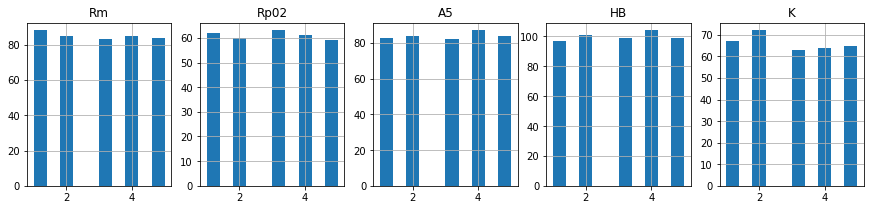

In [10]:
bins = np.linspace(y.min()-0.1, y.max()+0.1, 6)
# bins = [-1, 2.7, 4.5, 6.5, 8.4, 100] #a5
# bins = [0, 696, 813, 900, 1100, 2000] #rp02
# bins = [0, 52, 75, 90, 110, 300] #k
# bins = [0, 286, 325, 370, 415, 1000] #hb
bins = [0, 960, 1045, 1127, 1264, 2000] #rm

bins_map = {
    'Rm': [0, 960, 1045, 1127, 1264, 2000],
    'Rp02': [0, 696, 813, 900, 1100, 2000],
    'HB': [0, 286, 325, 370, 415, 1000],
    'A5': [0, 2.7, 4.5, 6.5, 8.4, 100],
    'K':  [0, 52, 75, 90, 110, 300]
}

y_binned = np.digitize(y, bins)
# print(y_binned)
# pd.Series(y_binned).hist()
fig, axes = plt.subplots(1, 5, figsize=[15, 3])
for i, feat in enumerate(physical_properties):
    ys = df_org[feat].dropna().values
    bins = bins_map[feat]
    ys_binned = np.digitize(ys, bins)
    axes[i].set_title(feat)
    pd.Series(ys_binned).hist(ax=axes[i])
plt.show()

In [15]:
df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "HB"
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
X = df_comp[predictors].values
y = df_comp[target_column].values
bins = bins_map[target_column]
y_binned = np.digitize(y, bins)
param_grid = { 
    'n_estimators': [10, 50, 100],
    'max_features': ['auto', 8, 9, 10, 11, 12],
    'max_depth' : [15, 20, 25, 30],
    'criterion' : ['mse', 'mae'],
    'min_samples_split': [2, 3, 4]
}

rfc=RandomForestRegressor(random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=190195)
CV_rfc_mae = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=kfold.split(X, y_binned), verbose=1, scoring=['neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error', n_jobs=-1)
CV_rfc_mae.fit(X, y)
CV_rfc_mae
# CV_rfc_r2 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=kfold.split(X, y_binned), verbose=1, scoring=['neg_mean_absolute_error', 'r2'], refit='r2', n_jobs=-1)
# CV_rfc_r2.fit(X, y)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.6min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000002D4AB840BC8>,
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [15, 20, 25, 30],
                         'max_features': ['auto', 8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 50, 100]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error', 'r2'], verbose=1)

In [14]:
print(CV_rfc_mae.best_score_)
print(CV_rfc_mae.best_params_)

# print(CV_rfc_r2.best_score_)
# print(CV_rfc_r2.best_params_)
cv_results = pd.DataFrame(CV_rfc_mae.cv_results_)
cv_results.sort_values(by=['rank_test_neg_mean_absolute_error'])[['param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators', 'mean_test_r2', 'mean_test_neg_mean_absolute_error']].to_csv('{}_rf_mae.csv'.format(target_column))
cv_results.sort_values(by=['rank_test_r2'])[['param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators', 'mean_test_r2', 'mean_test_neg_mean_absolute_error']].to_csv('{}_rf_r2.csv'.format(target_column))

-66.27190163934426
{'criterion': 'mse', 'max_depth': 25, 'max_features': 11, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
import xgboost as xgb
df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "K"
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
X = df_comp[predictors].values
y = df_comp[target_column].values
bins = bins_map[target_column]
y_binned = np.digitize(y, bins)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.3, 0.5, 1.0],
    'max_depth': [6, 10, 20, 30],
    'eval_metric': ['rmse', 'mae'],
    'booster': ['gbtree', 'gblinear', 'dart']
}

xgbr=xgb.XGBRegressor(random_state=42, n_jobs=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=190195)
CV_xgbr_mae = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=kfold.split(X, y_binned), verbose=1, scoring=['neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error', n_jobs=-1)
CV_xgbr_mae.fit(X, y)
# xgbr=xgb.XGBRegressor(random_state=42, n_jobs=1)
# CV_xgbr_r2 = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=kfold.split(X, y_binned), verbose=1, scoring=['neg_mean_absolute_error', 'r2'], refit='r2', n_jobs=-1)
# CV_xgbr_r2.fit(X, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   24.7s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000021E02968EC8>,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=na...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'e

In [51]:
print(CV_xgbr_mae.best_score_)
print(CV_xgbr_mae.best_params_)

cv_results = pd.DataFrame(CV_xgbr_mae.cv_results_)
cv_results.sort_values(by=['rank_test_neg_mean_absolute_error'])[['param_learning_rate', 'param_subsample', 'param_max_depth', 'param_eval_metric', 'param_booster', 'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error']].to_csv('{}_xgbr_mae.csv'.format(target_column))
cv_results.sort_values(by=['rank_test_r2'])[['param_learning_rate', 'param_subsample', 'param_max_depth', 'param_eval_metric', 'param_booster', 'mean_test_r2', 'std_test_r2']].to_csv('{}_xgbr_r2.csv'.format(target_column))

-12.719997389043023
{'booster': 'dart', 'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 30, 'subsample': 0.5}


In [81]:
import worker2
import json
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from multiprocessing import Pool
df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "HB"
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
X = df_comp[predictors].values
y = df_comp[target_column].values
bins = bins_map[target_column] #k
y_binned = np.digitize(y, bins)
if __name__ ==  '__main__': 
    params_grid= {
        'kernel': [1e-1, 1e-2, 1e-3],
        'bias': [1e-1, 1e-2, 1e-3],
        'activity': [1e-1, 1e-2, 1e-3],
        'units': [20, 30, 40],
        'epochs': [500, 1000],
        'batch_size': [32, 64],
        'patience': [50, 100, 200],
        'learning_rate': [0.1],
        'data': [[X, y, y_binned]]
    }
    params_list = list(ParameterGrid(params_grid))
    num_processors = 6
    p = Pool(processes = num_processors)
    
    result_list_tqdm = []
    for result in tqdm(p.imap_unordered(func=worker2.worker, iterable=params_list), total=len(params_list)):
        result_list_tqdm.append(result)
    p.close()
    p.join()
    with open('keras_HB.json', 'w') as outfile:
        json.dump(result_list_tqdm, outfile)

(500, 14)

In [5]:
import json

def get_best(keys, order, data):
    best_vals = None
    best_values = [data[0][k] for k in keys]
    for i in range(1, len(data)):
        values = [data[i][k] for k in keys]
        new_best = True
        for j, o in enumerate(order):
            if o == "max":
                new_best = values[j] > best_values[j]
            if o == 'min':
                new_best = values[j] < best_values[j]
        if new_best:
            best_values = values
            best_vals = data[i]
    return best_vals

 
with open('keras_Rp02.json') as f:
    results = json.load(f)


# print('best mae,r2 {}'.format(get_best(['mae', 'r2'], ['min', 'max'], results)))
# print('best mae {}'.format(get_best(['mae'], ['min'], results)))
# print('best r2 {}'.format(get_best(['r2'], ['max'], results)))
# results.sort(key=lambda x: x['r2'], reverse=True)
# for r in range(5):
#     res = results[r]
#     print('{} & {} & {} & {} & {} & {} & {} & {:0.4f}'.format(res['units'], res['epochs'], res['batch_size'], res['patience'], res['kernel'], res['bias'], res['activity'], res['r2']))
# print()
# res = results[-1]
# print('{} & {} & {} & {} & {} & {} & {} & {:0.4f}'.format(res['units'], res['epochs'], res['batch_size'], res['patience'], res['kernel'], res['bias'], res['activity'], res['r2']))

results.sort(key=lambda x: x['mae'])
for r in range(5):
    res = results[r]
    print('{} & {} & {} & {} & {} & {} & {} & {:0.3f}'.format(res['units'], res['epochs'], res['batch_size'], res['patience'], res['kernel'], res['bias'], res['activity'], res['mae']))
print()
res = results[-1]
print('{} & {} & {} & {} & {} & {} & {} & {:0.3f}'.format(res['units'], res['epochs'], res['batch_size'], res['patience'], res['kernel'], res['bias'], res['activity'], res['mae']))

40 & 1000 & 64 & 200 & 0.1 & 0.01 & 0.01 & 61.531
40 & 1000 & 32 & 100 & 0.1 & 0.1 & 0.001 & 61.731
40 & 500 & 32 & 200 & 0.1 & 0.1 & 0.01 & 62.037
40 & 1000 & 64 & 100 & 0.1 & 0.01 & 0.1 & 62.540
40 & 1000 & 32 & 200 & 0.1 & 0.001 & 0.01 & 62.786

20 & 500 & 64 & 100 & 0.001 & 0.001 & 0.001 & 86.576


In [45]:
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import regularizers
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

from numpy.random import seed
seed(1234)

tf.random.set_seed(5678)

print(len(predictors))
print(X.shape[1])

14
14


In [46]:
import worker
import json
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from multiprocessing import Pool

if __name__ ==  '__main__': 
    params_grid= {
    'kernel': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'bias': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'activity': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'units': [10, 25], 
    'data': [[X, y, y_binned]]
    }
    params_list = list(ParameterGrid(params_grid))
    num_processors = 12
    p = Pool(processes = num_processors)
    
    result_list_tqdm = []
    for result in tqdm(p.imap_unordered(func=worker.worker, iterable=params_list), total=len(params_list)):
        result_list_tqdm.append(result)
    p.close()
    p.join()
    with open('data_a5.json', 'w') as outfile:
        json.dump(result_list_tqdm, outfile)

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [1:58:29<00:00, 28.44s/it]


In [47]:
df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "K"
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
X = df_comp[predictors].values
y = df_comp[target_column].values
bins = bins_map[target_column] #k
y_binned = np.digitize(y, bins)
if __name__ ==  '__main__': 
    params_grid= {
    'kernel': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'bias': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'activity': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'units': [10, 25], 
    'data': [[X, y, y_binned]]
    }
    params_list = list(ParameterGrid(params_grid))
    num_processors = 12
    p = Pool(processes = num_processors)
    
    result_list_tqdm = []
    for result in tqdm(p.imap_unordered(func=worker.worker, iterable=params_list), total=len(params_list)):
        result_list_tqdm.append(result)
    p.close()
    p.join()
    with open('data_k.json', 'w') as outfile:
        json.dump(result_list_tqdm, outfile)

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [2:10:56<00:00, 31.42s/it]


In [94]:
import json

def get_best(keys, order, data):
    best_vals = None
    best_values = [data[0][k] for k in keys]
    for i in range(1, len(data)):
        values = [data[i][k] for k in keys]
        new_best = True
        for j, o in enumerate(order):
            if o == "max":
                new_best = values[j] > best_values[j]
            if o == 'min':
                new_best = values[j] < best_values[j]
        if new_best:
            best_values = values
            best_vals = data[i]
    return best_vals

 
with open('data_Rm.json') as f:
    results_10_25 = json.load(f)

results_25 = list(filter(lambda x: x['units'] == 25, results_10_25))
print('units 25')
print('best mae,r2 {}'.format(get_best(['mae', 'r2'], ['min', 'max'], results_25)))
print('best mae {}'.format(get_best(['mae'], ['min'], results_25)))
print('best r2 {}'.format(get_best(['r2'], ['max'], results_25)))
results_25.sort(key=lambda x: x['r2'], reverse=True)
for r in range(3):
    print(results_25[r])


results_10 = list(filter(lambda x: x['units'] == 10, results_10_25))
print('units 10')
print('best mae,r2 {}'.format(get_best(['mae', 'r2'], ['min', 'max'], results_10)))
print('best mae {}'.format(get_best(['mae'], ['min'], results_10)))
print('best r2 {}'.format(get_best(['r2'], ['max'], results_10)))
results_10.sort(key=lambda x: x['r2'], reverse=True)
for r in range(3):
    print(results_10[r])

units 25
best mae,r2 {'kernel': 1e-05, 'bias': 0.0001, 'activity': 0.1, 'units': 25, 'mae': 69.51046171300553, 'r2': 0.766880531455568}
best mae {'kernel': 0.001, 'bias': 0.01, 'activity': 0.0001, 'units': 25, 'mae': 68.00346564797795, 'r2': 0.7642746685339055}
best r2 {'kernel': 1e-05, 'bias': 0.0001, 'activity': 0.1, 'units': 25, 'mae': 69.51046171300553, 'r2': 0.766880531455568}
{'kernel': 1e-05, 'bias': 0.0001, 'activity': 0.1, 'units': 25, 'mae': 69.51046171300553, 'r2': 0.766880531455568}
{'kernel': 0.001, 'bias': 1e-05, 'activity': 1e-05, 'units': 25, 'mae': 68.19447176585477, 'r2': 0.7646683831209674}
{'kernel': 0.001, 'bias': 0.01, 'activity': 0.0001, 'units': 25, 'mae': 68.00346564797795, 'r2': 0.7642746685339055}
units 10
best mae,r2 {'kernel': 0.0001, 'bias': 1e-05, 'activity': 0.001, 'units': 10, 'mae': 74.18701430376838, 'r2': 0.7312239896823066}
best mae {'kernel': 0.01, 'bias': 0.01, 'activity': 1e-05, 'units': 10, 'mae': 73.98363197954964, 'r2': 0.7277218874917877}
bes

In [20]:
feature = 'K'

with open('data_{}.json'.format(feature)) as f:
    results_10_25 = json.load(f)

results_25 = list(filter(lambda x: x['units'] == 25, results_10_25))
results_25.sort(key=lambda x: x['r2'], reverse=True)
results_10 = list(filter(lambda x: x['units'] == 10, results_10_25))
results_10.sort(key=lambda x: x['r2'], reverse=True)

print(results_25[0])
print(results_25[1])
print(results_10[0])
print(results_10[1])

{'kernel': 0.1, 'bias': 1e-05, 'activity': 1e-05, 'units': 25, 'mae': 15.161674114184162, 'r2': 0.6732214316905397}
{'kernel': 0.1, 'bias': 0.01, 'activity': 0.001, 'units': 25, 'mae': 15.067089699950923, 'r2': 0.6700302070285812}
{'kernel': 0.1, 'bias': 0.01, 'activity': 0.1, 'units': 10, 'mae': 17.258454171860933, 'r2': 0.5709471179511467}
{'kernel': 0.001, 'bias': 0.01, 'activity': 1e-05, 'units': 10, 'mae': 17.71462976122183, 'r2': 0.5690575199020445}


In [50]:
import training_model_without_cv
import json
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from multiprocessing import Pool
import pickle

df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "K"
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
X = df_comp[predictors].values
y = df_comp[target_column].values
bins = bins_map[target_column] 
y_binned = np.digitize(y, bins)

feature = target_column

with open('data_{}.json'.format(feature)) as f:
    results_10_25 = json.load(f)

results_25 = list(filter(lambda x: x['units'] == 25, results_10_25))
results_25.sort(key=lambda x: x['r2'], reverse=True)
results_10 = list(filter(lambda x: x['units'] == 10, results_10_25))
results_10.sort(key=lambda x: x['r2'], reverse=True)

regularization = [results_25[0], results_25[1],results_10[0], results_10[1]]

def define_stacked_model(models):
    model_input = Input(shape=models[0].input_shape[1:])
    for i, m in enumerate(models):
        m._name = str(i)
    yModels = [model(model_input) for model in models] 
    
    yAvg=layers.average(yModels)
    modelEns = Model(inputs=model_input, outputs=yAvg, name='ensemble')
    return modelEns

def load_n_best_models(training_results, n, feature):
    training_results.sort(key=lambda x: x['r2'], reverse=True)
    models = []
    for i in range(n):
        params = training_results[i]
        path = 'models_{}\model_{}_{}_{}_{}.h5'.format(feature, params['units'], params['kernel'], params['bias'], params['activity'])
        models.append(keras.models.load_model(path))
    return models

if __name__ ==  '__main__': 
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=190195)
    i = 0
    for train, test in kfold.split(X, y_binned):
        models_params_grid = {
            'units': [i for i in range(30, 2, -1)],
            'regularization': regularization,
            'data': [[X, y, train, test]],
            'feature': [feature],
            'split': [i]
        }
        params_list = list(ParameterGrid(models_params_grid))
        num_processors = 12
        p = Pool(processes = num_processors)
        training_results = []
        for result in tqdm(p.imap_unordered(func=training_model_without_cv.trainer, iterable=params_list), total=len(params_list)):
            training_results.append(result)
        p.close()
        p.join()
        
        with open('training_{}/training_{}.dump'.format(feature, i), 'wb') as outfile:
            pickle.dump(training_results, outfile)
        i = i+1
                

# model_committee = define_stacked_model(load_n_best_models(training_results, 50, feature))
        
        

100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [18:01<00:00,  9.66s/it]


In [52]:
training_results.sort(key=lambda x: x['r2'], reverse=True)
for r in range(50):
    print(training_results[r])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
model = tf.keras.models.load_model('models_HB\model_30_0.1_0.001_0.001.h5')
model.predict(X[0:10])

array([[413.12137],
       [388.4637 ],
       [347.9506 ],
       [297.43372],
       [279.25937],
       [289.74484],
       [326.84686],
       [341.3744 ],
       [346.79187],
       [355.51562]], dtype=float32)

Best Rm for metric r2 with value 0.7735907450489132 is {'bias': 1e-05, 'kernel': 0.001, 'activity': 1e-05, 'units': 20}
Best Rp02 for metric r2 with value 0.789385855283173 is {'bias': 0.1, 'kernel': 0.1, 'activity': 1e-05, 'units': 20}
Best A5 for metric r2 with value 0.6514034027077434 is {'bias': 0.0001, 'kernel': 0.001, 'activity': 1e-05, 'units': 17}
Best HB for metric r2 with value 0.8206082588897686 is {'bias': 0.01, 'kernel': 0.1, 'activity': 1e-05, 'units': 29}
Best K for metric r2 with value 0.666467730344624 is {'bias': 0.01, 'kernel': 0.1, 'activity': 0.001, 'units': 30}


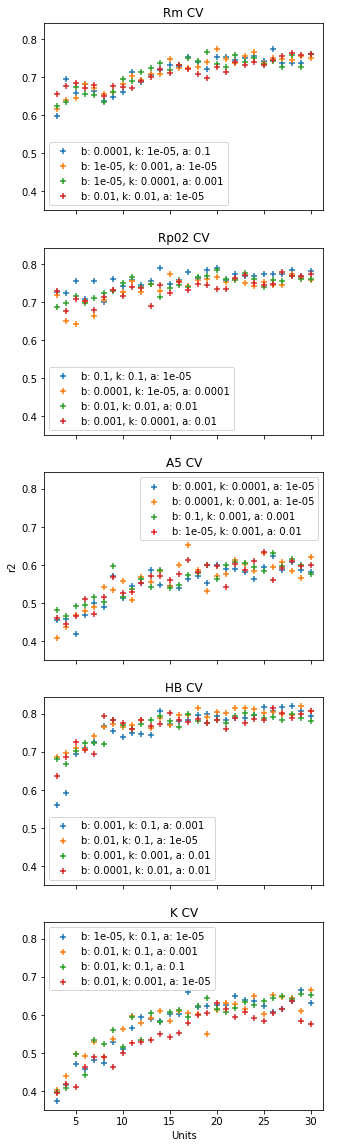

Best Rm for metric mae with value 69.14734696691175 is {'bias': 0.0001, 'kernel': 1e-05, 'activity': 0.1, 'units': 26}
Best Rp02 for metric mae with value 71.13597952420595 is {'bias': 0.01, 'kernel': 0.01, 'activity': 0.01, 'units': 28}
Best A5 for metric mae with value 1.4988435614080657 is {'bias': 0.1, 'kernel': 0.001, 'activity': 0.001, 'units': 26}
Best HB for metric mae with value 21.36653056435303 is {'bias': 0.001, 'kernel': 0.001, 'activity': 0.01, 'units': 17}
Best K for metric mae with value 15.2689297231625 is {'bias': 0.01, 'kernel': 0.001, 'activity': 1e-05, 'units': 28}


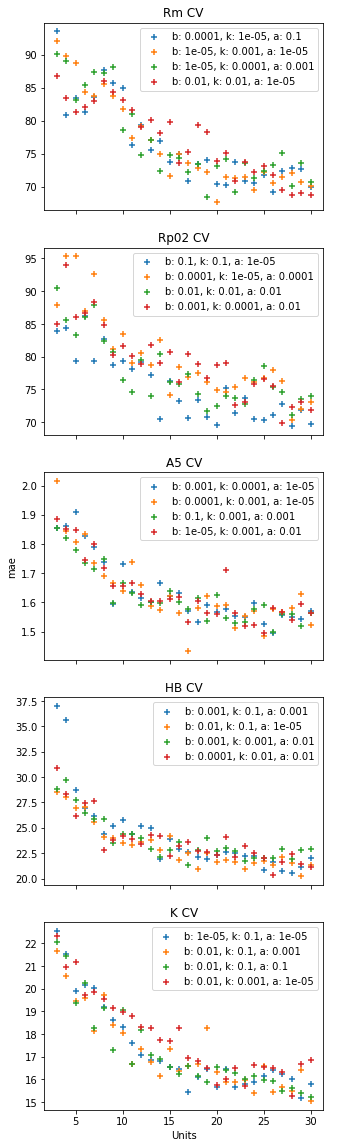

In [79]:
import matplotlib.pyplot as plt
import pickle

def drop_stats(reg):
    reg.pop('r2')
    reg.pop('mae')
    reg.pop('units')
    return reg

def get_regularization(prop):
    with open('data_{}.json'.format(prop)) as f:
        results_10_25 = json.load(f)

    results_25 = list(filter(lambda x: x['units'] == 25, results_10_25))
    results_25.sort(key=lambda x: x['r2'], reverse=True)
    results_10 = list(filter(lambda x: x['units'] == 10, results_10_25))
    results_10.sort(key=lambda x: x['r2'], reverse=True)

    return [drop_stats(reg) for reg in [results_25[0], results_25[1],results_10[0], results_10[1]]]

with open('training_Rm/training_0.dump', 'rb') as outfile:
    training_results = pickle.load(outfile)
    

def plot_performance(training_results, metric, sharey=True):
    fig, axes = plt.subplots(len(physical_properties), 5, figsize=(20, 20), sharex=True, sharey=sharey)    
    for k, prop in enumerate(physical_properties):
        regularization = get_regularization(prop)
        for i in range(5):
            with open('training_{}/training_{}.dump'.format(prop, i), 'rb') as outfile:
                training_results = pickle.load(outfile)
                x = [j for j in range(3, 31)]
                ys = [[0 for _ in range(28)], [0 for _ in range(28)], [0 for _ in range(28)], [0 for _ in range(28)]]
                for model_stats in training_results:
                    units = model_stats['units']
                    kernel = model_stats['kernel']
                    bias = model_stats['bias']
                    activity = model_stats['activity']
                    val = model_stats[metric]
                    reg_index = regularization.index({'kernel': kernel, 'bias': bias, 'activity': activity})
                    ys[reg_index][units-3] = val
                for j, y in enumerate(ys):
                    axes[k, i].scatter(x, y, marker='+', label='b: {}, k: {}, a: {}'.format(regularization[j]['bias'], regularization[j]['kernel'], regularization[j]['activity'])) 
                axes[k, i].set_title('{} split: {}'.format(prop, i))
                axes[k, i].legend()
    # fig.tight_layout()
    # plt.legend()
    fig.add_subplot(111, frameon=False)
    plt.xlabel('Units')
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.ylabel(metric)
    plt.savefig('perf_{}.png'.format(metric))
    plt.show()
    
def plot_performance_avg(training_results, metric, sharey=True):
    fig, axes = plt.subplots(len(physical_properties), 1, figsize=(5, 20), sharex=True, sharey=sharey)    
    for k, prop in enumerate(physical_properties):
        best = 0
        best_props = None
        regularization = get_regularization(prop)
        x = [j for j in range(3, 31)]
        ys = [[0 for _ in range(28)], [0 for _ in range(28)], [0 for _ in range(28)], [0 for _ in range(28)]]
        for i in range(5):
            with open('training_{}/training_{}.dump'.format(prop, i), 'rb') as outfile:
                training_results = pickle.load(outfile)
                for model_stats in training_results:
                    units = model_stats['units']
                    kernel = model_stats['kernel']
                    bias = model_stats['bias']
                    activity = model_stats['activity']
                    val = model_stats[metric]
                    reg_index = regularization.index({'kernel': kernel, 'bias': bias, 'activity': activity})
                    ys[reg_index][units-3] += val
                    
        for j, y in enumerate(ys):
            y = [v/5.0 for v in y]
            y_to_sort = list(y)
            y_to_sort.sort(reverse=metric=='r2')
            best_val = y_to_sort[0]
            
            if best_val > best:
                best = best_val
                best_props = {
                    'bias': regularization[j]['bias'],
                    'kernel': regularization[j]['kernel'],
                    'activity': regularization[j]['activity'],
                    'units': x[y.index(best_val)]
                }
            axes[k].scatter(x, y, marker='+', label='b: {}, k: {}, a: {}'.format(regularization[j]['bias'], regularization[j]['kernel'], regularization[j]['activity'])) 
        axes[k].set_title('{} CV'.format(prop))
        axes[k].legend()
        print('Best {} for metric {} with value {} is {}'.format(prop, metric, best, best_props))
    # fig.tight_layout()
    # plt.legend()
    fig.add_subplot(111, frameon=False)
    plt.xlabel('Units')
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.ylabel(metric)
    plt.savefig('perf_avg_{}.png'.format(metric))
    plt.show()
    
# def get_best_models_stats(training_results, metric):
#     bests = {}
#     for feature in physical_properties:
#         val = 0.0
#         for i in range(5):
#             with open('training_{}/training_{}.dump'.format(feature, i), 'rb') as outfile:
                

# plot_performance(training_results, 'r2')
# plot_performance(training_results, 'mae', sharey=False)
plot_performance_avg(training_results, 'r2')

plot_performance_avg(training_results, 'mae', sharey=False)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import Model
import pickle

def define_stacked_model(models):
    model_input = Input(shape=models[0].input_shape[1:])
    for i, m in enumerate(models):
        m._name = 'model_{}'.format(i)
    yModels = [model(model_input) for model in models] 
    
    yAvg=layers.average(yModels)
    modelEns = Model(inputs=model_input, outputs=yAvg, name='ensemble')
    return modelEns

loaded_models_cache = {}
def load_models(training_results, feature, split, n):
    models = []
    for i in range(n):
        params = training_results[i]
        path = 'models_{}\{}_model_{}_{}_{}_{}.h5'.format(feature, split, params['units'], params['kernel'], params['bias'], params['activity'])
        if path in loaded_models_cache:
            model = loaded_models_cache[path]
        else:
            model = keras.models.load_model(path)
            loaded_models_cache[path] = model
        models.append(model)
    return models
    
def get_avg_best(training_results, metric):
    result = list(training_results[0])
    for tr in training_results:
        tr.sort(key=lambda res: (res['units'], res['bias'], res['kernel'], res['activity']))
    for i in range(1, 5):
        for j in range(len(result)):
            result[j][metric] += training_results[i][j][metric]
    for j in range(len(result)):
        result[j][metric] /= 5.0
    result.sort(key=lambda res: res[metric], reverse=metric=='r2')
    return result    

def get_best_for_split(training_results, metric, split):
    results = training_results[split]
    results.sort(key=lambda res: res[metric], reverse=metric=='r2')
    return results
    

df_comp = df_org.copy()
predictors_to_inc_degree = chemical_composition + heat_treatment

new_predictors = predictors_to_inc_degree
df_comp['log_10(ausf_czas_sec)'] = df_comp.apply(lambda row: np.log10(row['ausf_czas']*60), axis=1)
other_predictors = ['grubosc']
generated_predictors = ['log_10(ausf_czas_sec)']
predictors = new_predictors + other_predictors + generated_predictors
target_column = "HB"
df_before_scaling = df_comp.copy()
df_comp[predictors] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(df_comp[predictors])
df_tmp = df_comp.copy()
df_comp = df_comp[predictors + [target_column]].dropna()
X = df_comp[predictors].values
y = df_comp[target_column].values
bins = bins_map[target_column] 
y_binned = np.digitize(y, bins)

feature = target_column
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=190195)

training_results = []
for i in range(5):
    with open('training_{}/training_{}.dump'.format(feature, i), 'rb') as outfile:
        tr = pickle.load(outfile)
        for t in tr:
            t.pop('history')
        training_results.append(tr)
    
def define_stacked_models_from_average_best(feature, training_results, metric, models_amount):
    avg_best = get_avg_best(training_results, metric)
    r2_sum= 0
    mae_sum = 0
    stats = {}
    for i, train_test in enumerate(kfold.split(X, y_binned)):
        train = train_test[0]
        test = train_test[1]
        models = load_models(avg_best, feature, i, models_amount)
            
        model_committee = define_stacked_model(models)
        tf.keras.models.save_model(
            model_committee,
            'models_committee_{}\{}_model_avg_{}_{}.h5'.format(feature, i, metric, models_amount),
            save_format='h5'
        )
        train_predictions = model_committee.predict(X[train])
        test_predictions = model_committee.predict(X[test])
        mae_test = mean_absolute_error(y[test], test_predictions)
        r2_test = r2_score(y[test], test_predictions)
        stats[i] = {'r2': r2_test, 'mae': mae_test}
        r2_sum += r2_test
        mae_sum += mae_test
    mae = mae_sum / 5
    r2 = r2_sum / 5
    print('r2: {}, mae: {}'.format(r2, mae))
    return stats

def define_stacked_models_from_best_for_split(feature, training_results, metric, models_amount):
    r2_sum= 0
    mae_sum = 0
    stats = {}
    for i, train_test in enumerate(kfold.split(X, y_binned)):
        train = train_test[0]
        test = train_test[1]
        best_for_split = get_best_for_split(training_results, metric, i)
        models = load_models(best_for_split, feature, i, models_amount)
            
        model_committee = define_stacked_model(models)
        tf.keras.models.save_model(
            model_committee,
            'models_committee_{}\{}_model_split_{}_{}.h5'.format(feature, i, metric, models_amount),
            save_format='h5'
        )
        train_predictions = model_committee.predict(X[train])
        test_predictions = model_committee.predict(X[test])
        mae_test = mean_absolute_error(y[test], test_predictions)
        r2_test = r2_score(y[test], test_predictions)
        stats[i] = {'r2': r2_test, 'mae': mae_test}
        r2_sum += r2_test
        mae_sum += mae_test
    mae = mae_sum / 5
    r2 = r2_sum / 5
    print('r2: {}, mae: {}'.format(r2, mae))
    return stats
        
stats = {}
for i in range(30, 1, -1):
    stats[i] = define_stacked_models_from_average_best(feature, training_results, 'mae', i)
    
with open('{}_committee_avg_mae.json'.format(feature), 'w') as outfile:
        json.dump(stats, outfile)
for i in range(30, 1, -1):
    stats[i] = define_stacked_models_from_best_for_split(feature, training_results, 'mae', i)
    
with open('{}_committee_split_mae.json'.format(feature), 'w') as outfile:
        json.dump(stats, outfile)

r2: 0.814044312394733, mae: 20.354589443181915
r2: 0.8298273316424746, mae: 19.435787259737243
r2: 0.830946244933342, mae: 19.437891768878952
r2: 0.8299334835825085, mae: 19.515319322047354
r2: 0.8297483986283478, mae: 19.552646112818838
r2: 0.8302298419157618, mae: 19.518593049260893
r2: 0.830732881971084, mae: 19.479539033147617
r2: 0.8308319941371927, mae: 19.486600501653477
r2: 0.8312452152235817, mae: 19.451302540227694
r2: 0.8324169787307861, mae: 19.381202211994186
r2: 0.8319554938165309, mae: 19.429197887043017
r2: 0.8317534510334198, mae: 19.39709043132125
r2: 0.8306924483183492, mae: 19.4942243661283
r2: 0.8306514255898515, mae: 19.482385535561896
r2: 0.8303917071351226, mae: 19.435819721685828
r2: 0.8306642059115642, mae: 19.393830955237163
r2: 0.831666005182458, mae: 19.311404422382807
r2: 0.8321548214959684, mae: 19.272243467444195
r2: 0.8310307706148035, mae: 19.4178242913249
r2: 0.830802961647519, mae: 19.440101816584068
r2: 0.8318175620876508, mae: 19.36598389123684
r2:

In [77]:
y_test = model_committee.predict(X)
r2_test = r2_score(y, y_test)
mae_test = mean_absolute_error(y, y_test)
# max_e = max_error(y, y_test)
print(r2_test)
print(mae_test)
# print(max_e)

0.924154413717045
13.01575641139518


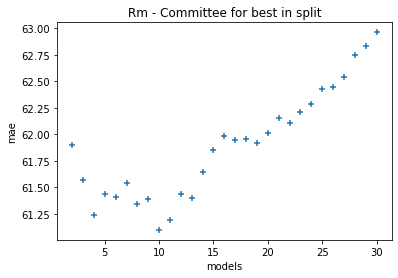

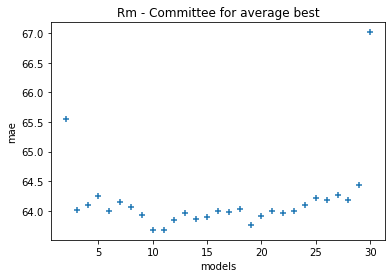

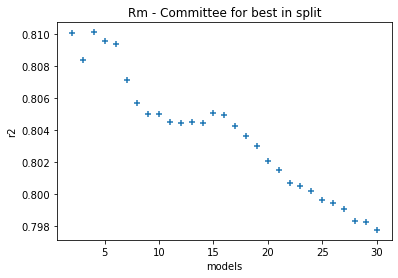

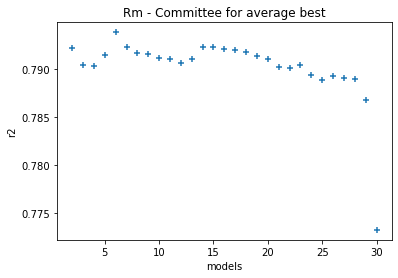

In [20]:
import matplotlib.pyplot as plt

def plot_committee_stats(stats_file, metric, title, filename):
    with open(stats_file, 'r') as file:
        stats = json.load(file)
    x = []
    y = []
    for units in range(2, 31):
        suum = 0.0
        for split in stats[str(units)]:
            suum +=stats[str(units)][split][metric]
        x.append(units)
        y.append(suum/5.0)
    plt.scatter(x,y, marker='+')
    plt.title(title)
    plt.xlabel('models')
    plt.ylabel(metric)
    plt.savefig('{}_{}.png'.format(filename, metric))
    plt.show()
    
feature = 'Rm'

# plot_committee_stats('committee_split.json'.format(feature), 'r2', 'Committee split')
# plot_committee_stats('committee_avg.json', 'r2', 'Committee avg')
plot_committee_stats('{}_committee_split_mae.json'.format(feature), 'mae', '{} - Committee for best in split'.format(feature), '{}_split'.format(feature))
plot_committee_stats('{}_committee_avg_mae.json'.format(feature), 'mae', '{} - Committee for average best'.format(feature), '{}_avg'.format(feature))
plot_committee_stats('{}_committee_split_r2.json'.format(feature), 'r2', '{} - Committee for best in split'.format(feature),'{}_split'.format(feature))
plot_committee_stats('{}_committee_avg_r2.json'.format(feature), 'r2', '{} - Committee for average best'.format(feature),'{}_avg'.format(feature))

In [41]:
def get_best_committee(stats_file, metric, strategy):
    with open(stats_file, 'r') as file:
        stats = json.load(file)
    final_stats = {}
    for units in range(2, 31):
        suum_mae = 0.0
        suum_r2 = 0.0
        for split in stats[str(units)]:
            suum_mae +=stats[str(units)][split]['mae']
            suum_r2 += stats[str(units)][split]['r2']
        final_stats[units]={'mae': suum_mae/5.0, 'r2' : suum_r2/5.0}
    sorted_stats = sorted(final_stats.items(), key=lambda kv: kv[1][metric], reverse=metric=='r2')
    return '{} & {} & {} & {:0.3f} & {:0.3f} \\\\'.format(strategy, metric, sorted_stats[0][0], sorted_stats[0][1]['r2'], sorted_stats[0][1]['mae'])
#     plt.scatter(x,y, marker='+')
#     plt.title(title)
#     plt.xlabel('models')
#     plt.ylabel(metric)
#     plt.savefig('{}_{}.png'.format(filename, metric))
#     plt.show()

feature = 'K'
print(get_best_committee('{}_committee_avg_r2.json'.format(feature), 'r2', 'avg'))
print(get_best_committee('{}_committee_avg_mae.json'.format(feature), 'mae', 'avg'))
print(get_best_committee('{}_committee_split_r2.json'.format(feature), 'r2', 'split'))
print(get_best_committee('{}_committee_split_mae.json'.format(feature), 'mae', 'split'))

avg & r2 & 8 & 0.683 & 14.732 \\
avg & mae & 10 & 0.686 & 14.387 \\
split & r2 & 5 & 0.712 & 13.808 \\
split & mae & 4 & 0.713 & 13.612 \\


In [ ]:
# from sklearn.model_selection import ParameterGrid

# params_grid= {
#     'kernel': [1e-2, 1e-3, 1e-4],
#     'bias': [1e-2, 1e-3, 1e-4],
#     'activity': [1e-2, 1e-3]
# }
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=190195)
# params_list = list(ParameterGrid(params_grid))
# scores = {}
# for i, params in enumerate(params_list):
#     print(params)
#     maescores = []
#     r2scores = []
#     for train, test in kfold.split(X, y_binned):
#         model = keras.Sequential()
#         model.add(layers.Dense(16, activation='tanh', 
#                                kernel_regularizer=regularizers.l2(params['kernel']),
#                                bias_regularizer=regularizers.l2(params['bias']),
#                                activity_regularizer=regularizers.l2(params['activity']),
#                                input_shape=[len(predictors)]))
#         model.add(layers.Dense(1))
#         model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae', 'mse'])
        
#         early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
#         history = model.fit(X[train], y[train], epochs=3000,
#                               batch_size=10, verbose=0,
#                               validation_data=(X[test], y[test]),
#                               callbacks=[early_stop])
#         train_predictions = model.predict(X[train])
#         test_predictions = model.predict(X[test])
#         print()
#         mae_test = max_error(y[test], test_predictions)
#         maescores.append(mae_test)
#         r2_test = r2_score(y[test], test_predictions)
#         r2scores.append(r2_test)
#         print("train_max_error: {}".format(max_error(y[train], train_predictions)))
#         print("test_max_error: {}".format(mae_test))
#         print('Train R2 = {:0.2f}.'.format(r2_score(y[train], train_predictions)))
#         print('Test R2 = {:0.2f}.'.format(r2_test))
#     print()
#     print('avg mae: {:0.2f}'.format(sum(maescores)/len(maescores)))
#     print('avg r2: {:0.2f}'.format(sum(r2scores)/len(r2scores)))
#     scores[i] = {'mae': sum(maescores)/len(maescores), 'r2': sum(r2scores)/len(r2scores)}

In [23]:
# scores_3_4_5 = list(scores)
# params_3_4_5 = list(params_list)
# best = [0, 9, 12]

# for i in best:
#     print(params_3_4_5[i])

{'activity': 0.001, 'bias': 0.001, 'kernel': 0.001}
{'activity': 0.0001, 'bias': 0.001, 'kernel': 0.001}
{'activity': 0.0001, 'bias': 0.0001, 'kernel': 0.001}


In [77]:
# best_model = None
# best_score = 10000000
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=51)
# for units in range(22, 1, -1):
#     print('======================================================================')
#     print('Units ' + str(units))
#     maescores = []
#     r2scores = []
#     for train, test in kfold.split(X, y_binned):
#         model = keras.Sequential()
#         model.add(layers.Dense(units, activation='tanh', 
#                                kernel_regularizer=regularizers.l2(1e-4),
#                                bias_regularizer=regularizers.l2(1e-4),
#                                activity_regularizer=regularizers.l2(1e-5),
#                                input_shape=[len(predictors)]))
#         model.add(layers.Dense(1))
#         model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae', 'mse'])
        
#         early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
#         history = model.fit(X[train], y[train], epochs=3000,
#                               batch_size=10, verbose=0,
#                               validation_data=(X[test], y[test]),
#                               callbacks=[early_stop])
# #          callbacks=[early_stop, tfdocs.modeling.EpochDots()])
# #         plt.plot(history.history['mae'], label='train')
# #         plt.plot(history.history['val_mae'], label='test')
# #         plt.legend()
# #         plt.show()
#         train_predictions = model.predict(X[train])
#         test_predictions = model.predict(X[test])
#         print()
#         mae_test = max_error(y[test], test_predictions)
#         maescores.append(mae_test)
#         r2_test = r2_score(y[test], test_predictions)
#         r2scores.append(r2_test)
#         print("train_max_error: {}".format(max_error(y[train], train_predictions)))
#         print("test_max_error: {}".format(mae_test))
#         print('Train R2 = {:0.2f}.'.format(r2_score(y[train], train_predictions)))
#         print('Test R2 = {:0.2f}.'.format(r2_test))
#     print()
#     print('avg mae: {:0.2f}'.format(sum(maescores)/len(maescores)))
#     print('avg r2: {:0.2f}'.format(sum(r2scores)/len(r2scores)))

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
best_model = None
best_score = 10000000
X_train, X_test = None, None
y_train, y_test = None, None
mse_cvscores = []
mae_cvscores = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=52)
for train, test in kfold.split(X, y_binned):
    model = xgb.XGBRegressor()
    model.fit(X[train], y[train], eval_set=[(X[test], y[test])], eval_metric='rmse', early_stopping_rounds=3, verbose=0)
    train_predictions = model.predict(X[train])
    test_predictions = model.predict(X[test])
    print("train_mae: {}".format(mean_absolute_error(y[train], train_predictions)))
    score = mean_squared_error(y[test], test_predictions)
    mae = mean_absolute_error(y[test], test_predictions)
    print("test_mae: {}".format(mean_absolute_error(y[test], test_predictions)))
    print("train_max_error: {}".format(max_error(y[train], train_predictions)))
    print("test_max_error: {}".format(max_error(y[test], test_predictions)))
    print('Train R2 = {:0.2f}.'.format(r2_score(y[train], train_predictions)))
    print('Test R2 = {:0.2f}.'.format(r2_score(y[test], test_predictions)))
    print()
    mse_cvscores.append(score)
    mae_cvscores.append(mae)
    if score < best_score:
        X_train, y_train = X[train], y[train]
        X_test, y_test = X[test], y[test]
        best_model = model
        best_score = score
print("MSE {:.2f} (+/- {:.2f})".format(np.mean(mse_cvscores), np.std(mse_cvscores)))
print("MAE {:.2f} (+/- {:.2f})".format(np.mean(mae_cvscores), np.std(mae_cvscores)))

ModuleNotFoundError: No module named 'xgboost'

In [200]:
# def get_parameters(dff):
#     cc = dff[chemical_composition].to_dict()
#     ht = dff[heat_treatment].to_dict()
#     other = dff[other_predictors]
#     params = {
#         "chemicalComposition": cc,
#         "heatTreatment": ht,
#     }
#     params.update(other)
#     return params

# min_values = df_before_scaling[predictors].min()
# max_values = df_before_scaling[predictors].max()

In [201]:
# conf = {
#     "modelInput" : predictors,
#     "minParams" : get_parameters(min_values),
# #     "maxParams" : get_parameters(max_values),
#     "offset" : 0.5,
# }
# with open("k_model_conf.json", 'w') as f:
#     json.dump(conf, f)

# best_model.save_model("k_xgb.bin")

Max error 81.19888916015623 for (362.9, 281.7011)


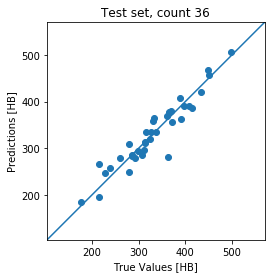

In [ ]:
# test_predictions = best_model.predict(X_test)
# print('Max error {} for {}'.format(max_error(y_test, test_predictions), str(find_max_error(y_test, test_predictions))))

# a = plt.axes(aspect='equal')
# plt.title('Test set, count {}'.format(y_test.shape[0]))
# plt.scatter(y_test, test_predictions)
# plt.xlabel('True Values [{}]'.format(target_column))
# plt.ylabel('Predictions [{}]'.format(target_column))
# lims = [min(y_test)-np.std(y_test), max(y_test)+np.std(y_test)]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

Max error 36.911968994140636 for (277.2, 314.11197)


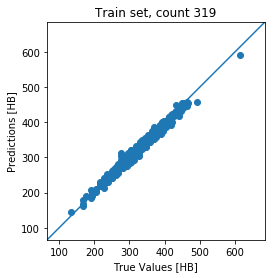

In [ ]:
# train_predictions = best_model.predict(X_train)
# print('Max error {} for {}'.format(max_error(y_train, train_predictions), str(find_max_error(y_train, train_predictions))))

# a = plt.axes(aspect='equal')
# plt.title('Train set, count {}'.format(y_train.shape[0]))
# plt.scatter(y_train, train_predictions)
# plt.xlabel('True Values [{}]'.format(target_column))
# plt.ylabel('Predictions [{}]'.format(target_column))
# lims = [min(y_train)-np.std(y_train), max(y_train)+np.std(y_train)]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

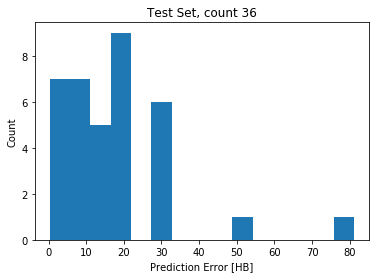

In [ ]:
# test_error = abs(test_predictions - y_test)
# # test_error = abs(test_predictions - y_test.reshape(-1, 1))
# plt.hist(test_error, bins = 15)
# plt.title('Test Set, count {}'.format(y_test.shape[0]))
# plt.xlabel('Prediction Error [{}]'.format(target_column))
# _ = plt.ylabel("Count")
# plt.show()

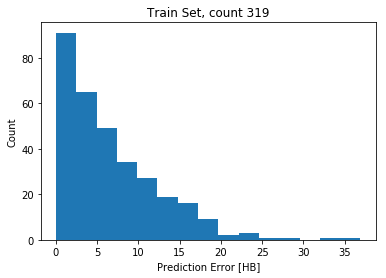

In [ ]:
# train_error = abs(train_predictions - y_train)
# # train_error = abs(train_predictions - y_train.reshape(-1, 1))
# plt.hist(train_error, bins = 15)
# plt.title('Train Set, count {}'.format(y_train.shape[0]))
# plt.xlabel('Prediction Error [{}]'.format(target_column))
# _ = plt.ylabel("Count")
# plt.show()

In [ ]:
# df_new = DataFrame()
# df_new[target_column] = df_tmp[target_column]
# df_new['{}_predicted'.format(target_column)] = df_tmp.apply(fill, axis = 1, args=(predictors, best_model))
# df_new.to_csv('{}_predicted.csv'.format(target_column))


In [ ]:
# df_new = DataFrame()
# df_new[target_column] = df_tmp[target_column]
# df_new['{}_predicted'.format(target_column)] = df_tmp.apply(fill, axis = 1, args=(predictors, best_model))
# df_new.to_csv('{}_predicted.csv'.format(target_column))


In [ ]:
# # train_error = abs(train_predictions - y_train)
# train_error = abs(train_predictions - y_train.reshape(-1, 1))
# plt.hist(train_error, bins = 15)
# plt.title('Train Set, count {}'.format(y_train.shape[0]))
# plt.xlabel('Prediction Error [{}]'.format(target_column))
# _ = plt.ylabel("Count")
# plt.show()

In [ ]:
# df_new = DataFrame()
# df_new[target_column] = df_tmp[target_column]
# df_new['{}_predicted'.format(target_column)] = df_tmp.apply(fill, axis = 1, args=(predictors, best_model))
# df_new.to_csv('{}_predicted.csv'.format(target_column))


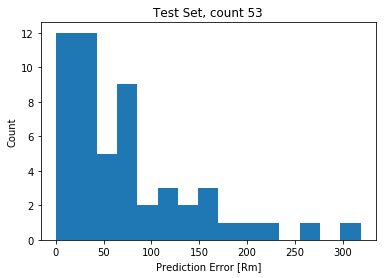

In [ ]:
df_new = DataFrame()
df_new[target_column] = df_tmp[target_column]
df_new['{}_predicted'.format(target_column)] = df_tmp.apply(fill, axis = 1, args=(predictors, best_model))
df_new.to_csv('{}_predicted.csv'.format(target_column))


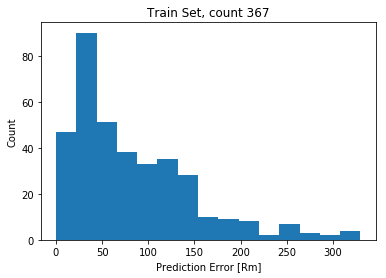

In [ ]:
# train_error = abs(train_predictions - y_train)
train_error = abs(train_predictions - y_train.reshape(-1, 1))
plt.hist(train_error, bins = 15)
plt.title('Train Set, count {}'.format(y_train.shape[0]))
plt.xlabel('Prediction Error [{}]'.format(target_column))
_ = plt.ylabel("Count")
plt.show()

In [ ]:
df_new = DataFrame()
df_new[target_column] = df_tmp[target_column]
df_new['{}_predicted'.format(target_column)] = df_tmp.apply(fill, axis = 1, args=(predictors, best_model))
df_new.to_csv('{}_predicted.csv'.format(target_column))
